In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay


# Ignoring Variables

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
# Load dataset
df = pd.read_csv("kidney_disease.csv")
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# EDA ( Data Preprocessing )

In [4]:
df.shape

(400, 26)

In [5]:
df.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
df.isnull().sum().sum()

1009

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
df['classification'] = df['classification'].str.strip()
df['classification'] = df['classification'].str.strip().replace({'ckd': 1, 'notckd': 0})

In [10]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

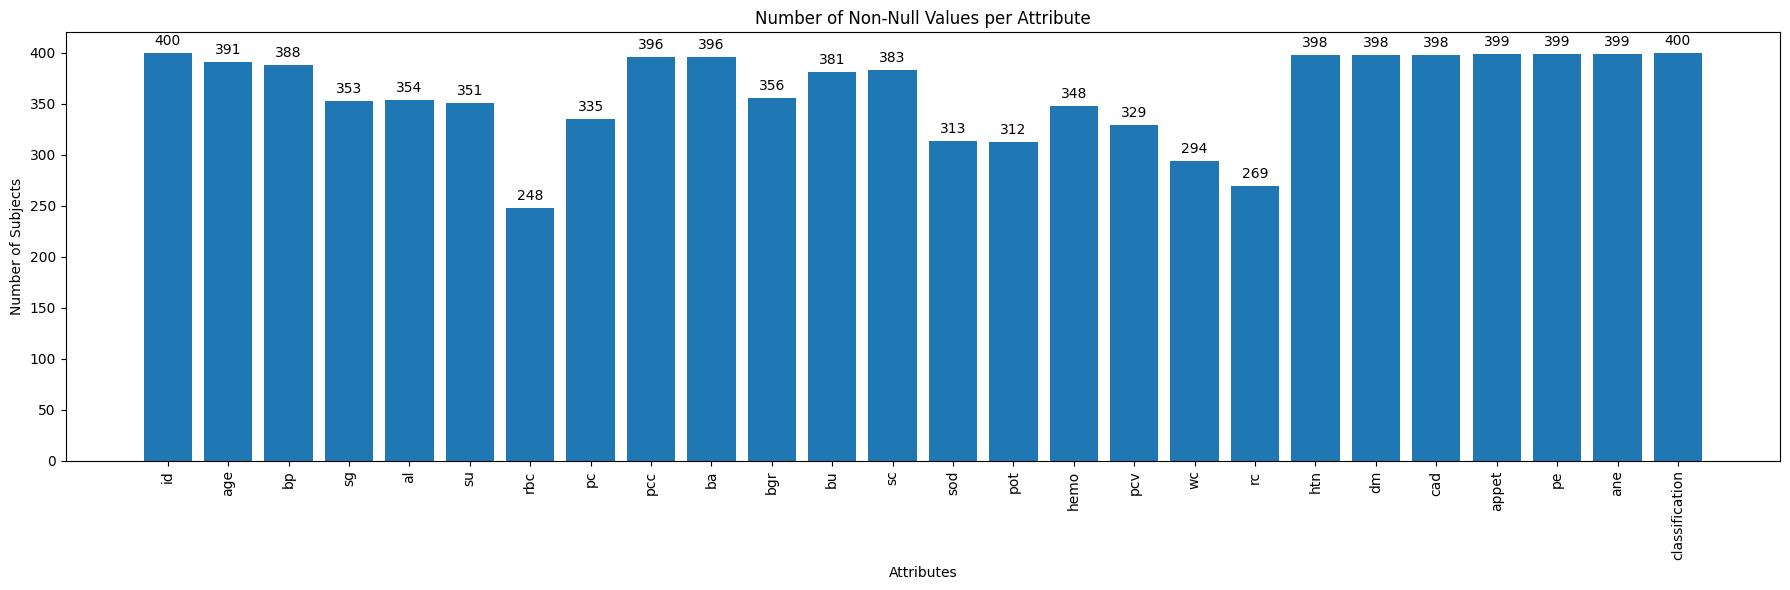

In [11]:
import matplotlib.pyplot as plt

# Count of non-null values per column
non_null_counts = df.notnull().sum()

# Plot
plt.figure(figsize=(18, 6))
bars = plt.bar(non_null_counts.index, non_null_counts.values)

# Annotate bars with their heights
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Number of Subjects")
plt.title("Number of Non-Null Values per Attribute")
plt.tight_layout()
plt.show()

In [12]:
# Replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# Convert to numeric wherever possible (object columns will remain unchanged)
df = df.apply(pd.to_numeric, errors='ignore')

# Fix missing values safely without chained assignment
for col in df.columns:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])  # 'ckd' → 1, 'notckd' → 0


In [14]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [16]:
df['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

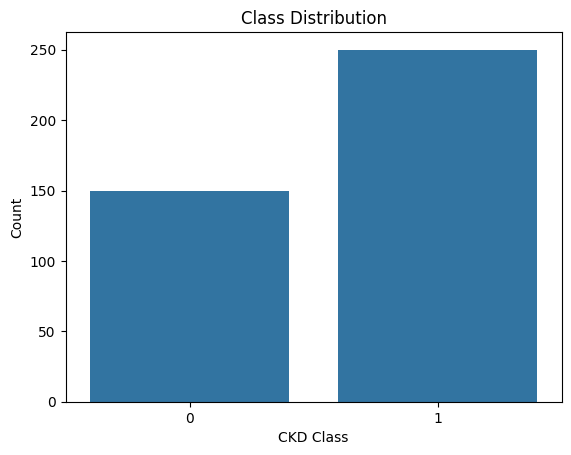

In [17]:
sns.countplot(x='classification', data=df)
plt.title("Class Distribution")
plt.xlabel("CKD Class")
plt.ylabel("Count")
plt.show()

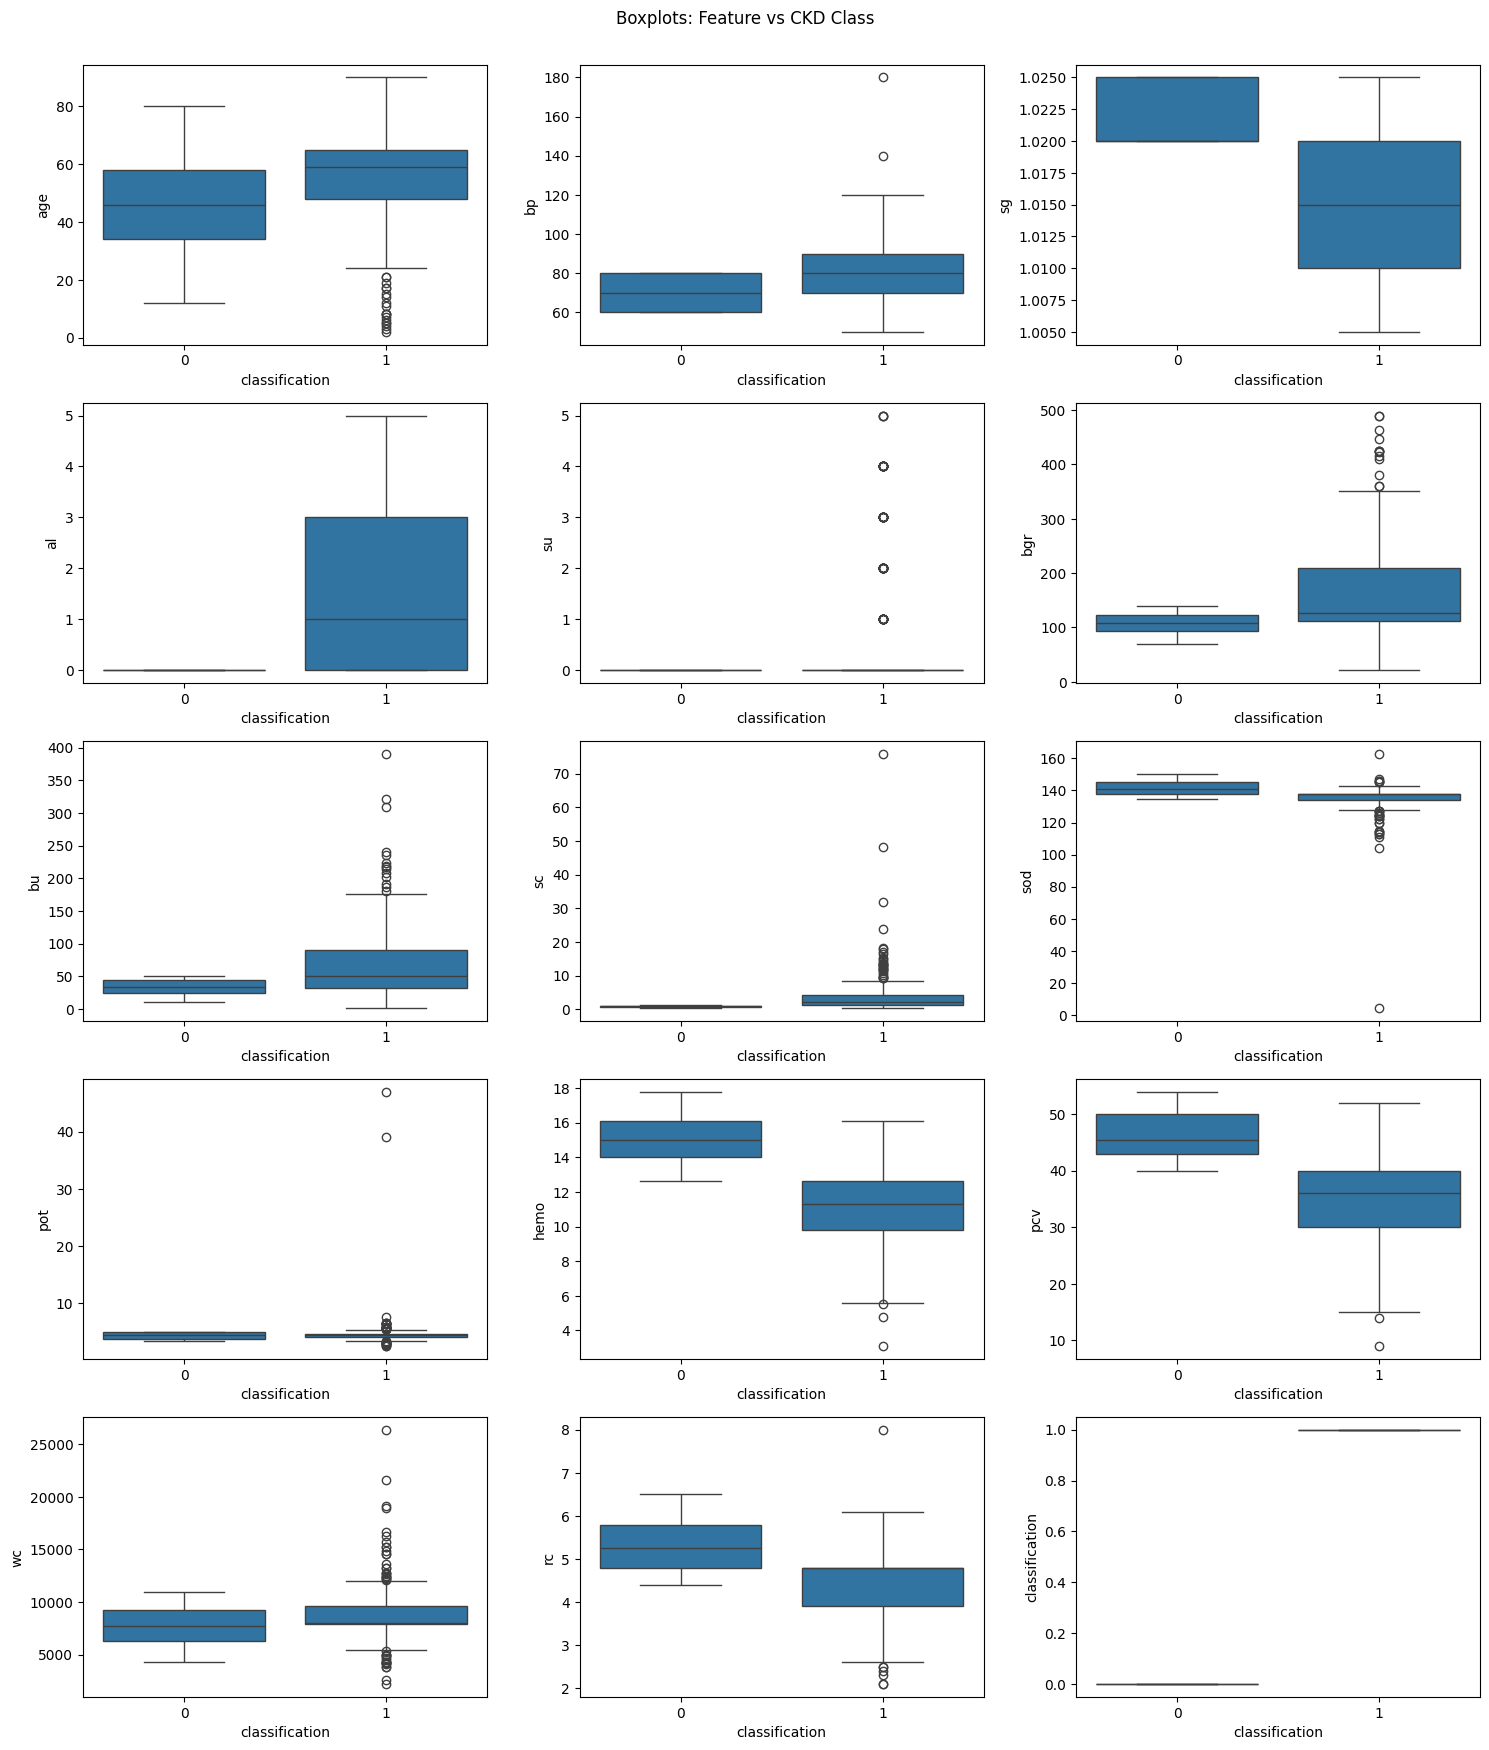

In [18]:
# Replace with your actual target column (e.g., 'class' or 'ckd')
target_col = 'classification'

# Ensure the column exists and is binary/label encoded
if target_col in df.columns:
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id'])

    plt.figure(figsize=(15, 20))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(6, 3, i)
        sns.boxplot(x=target_col, y=col, data=df)
        plt.tight_layout()
    plt.suptitle('Boxplots: Feature vs CKD Class', y=1.02)
    plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'classification']
Categorical Columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


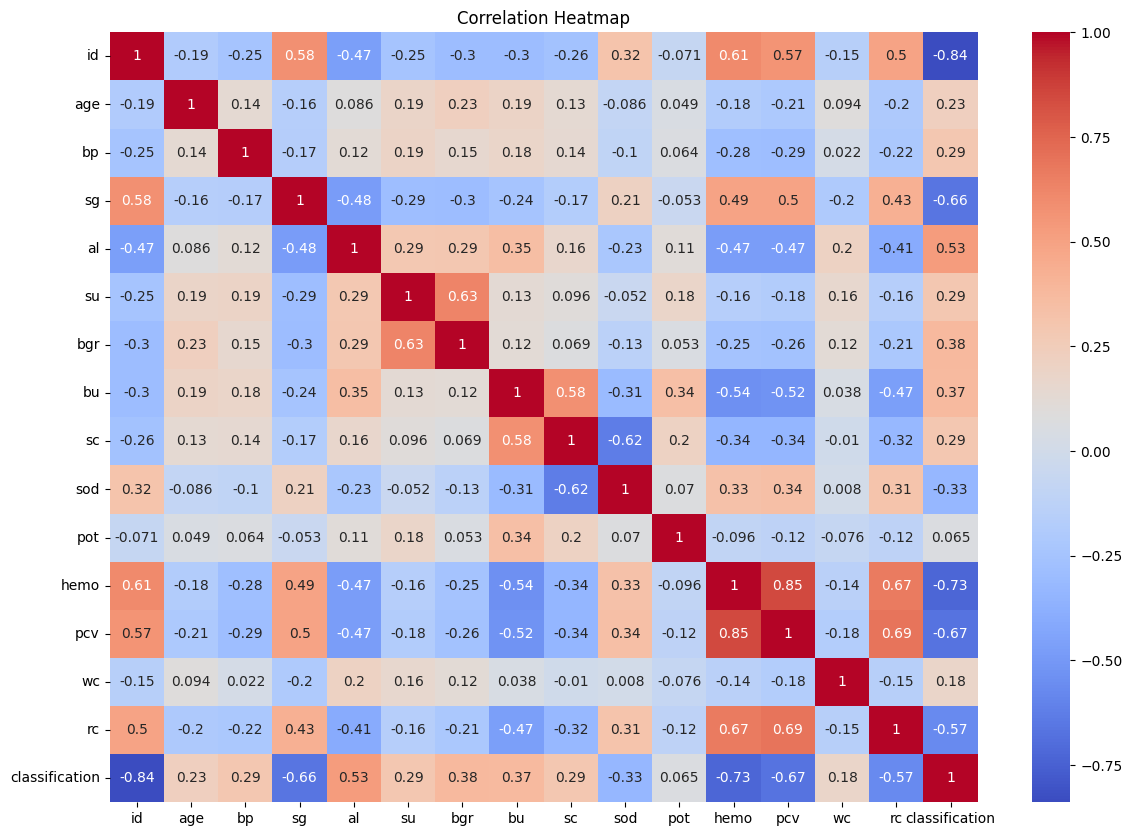

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

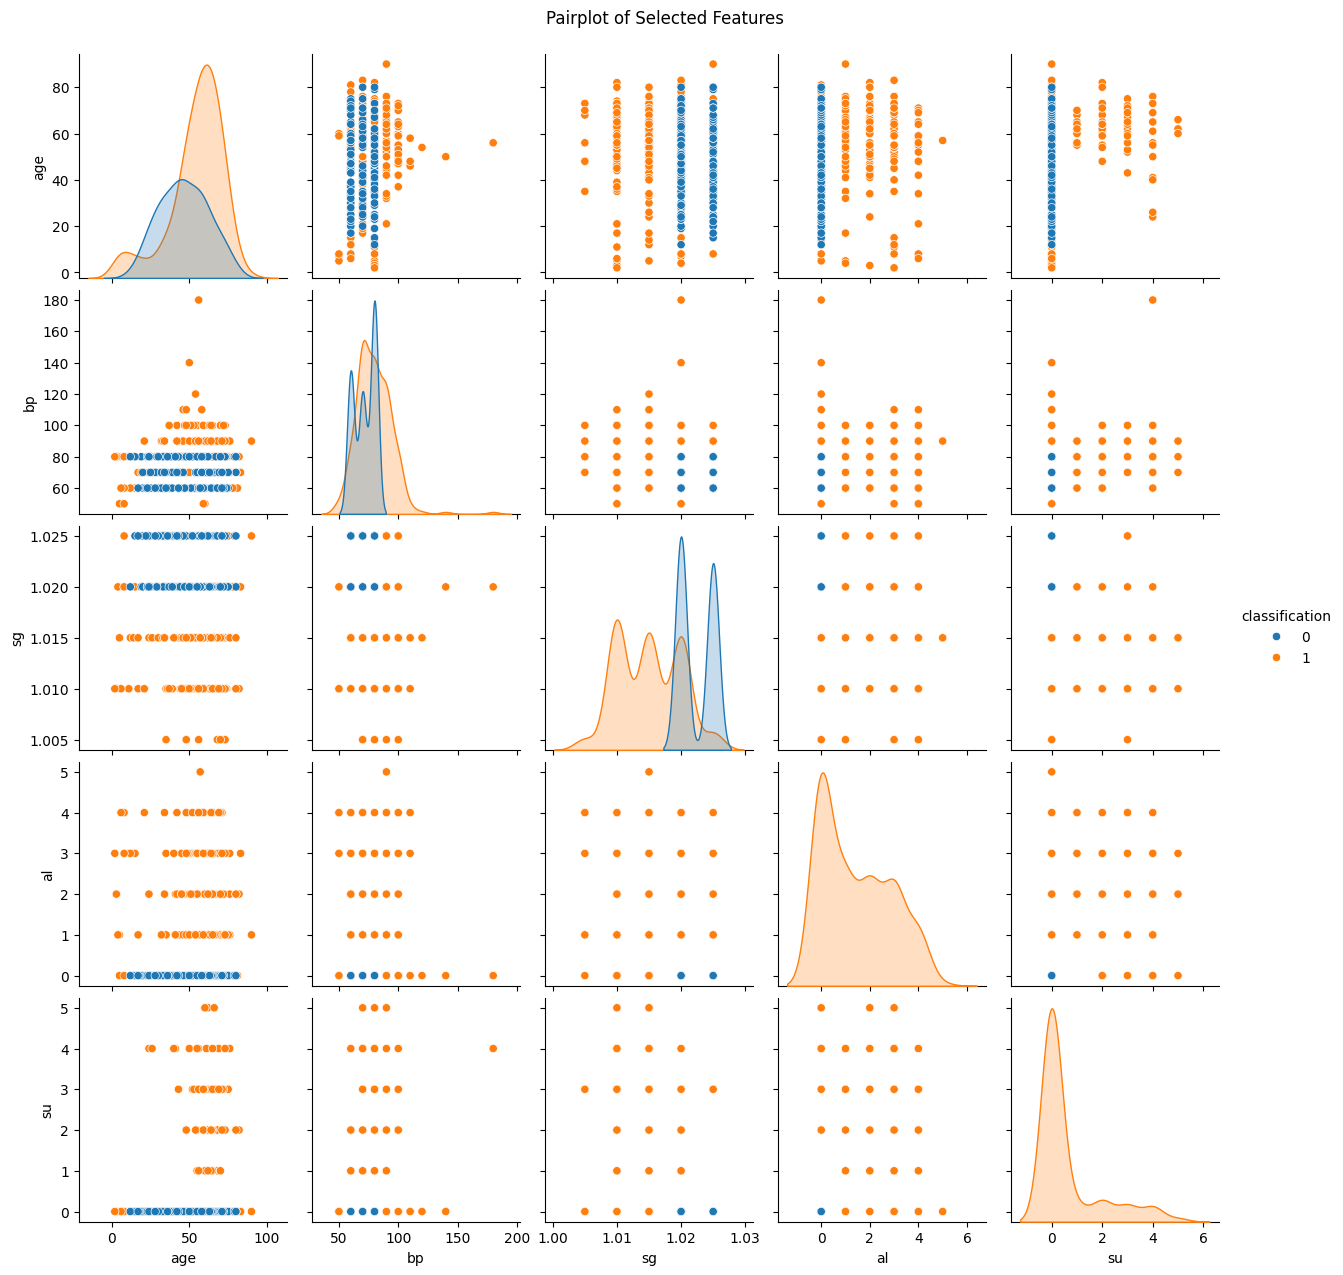

In [21]:
# Select a few features + target
features_subset = ['age', 'bp', 'sg', 'al', 'su', 'classification']

sns.pairplot(df[features_subset], hue='classification')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


# Model Creation ( With Data Splitting ) and Model Evaluation

In [22]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [23]:
# : Encode categorical columns ---
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [24]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,4,1,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,3,1,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,4,1,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,3,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,3,1,0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int32  
 7   pc              400 non-null    int32  
 8   pcc             400 non-null    int32  
 9   ba              400 non-null    int32  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [26]:
# Drop ID column if present
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# All models are Created in for loop

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [28]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

# Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['classification'])  # Features
y = df['classification']                 # Target

# Re-label target variable as binary (CKD = 1, Not CKD = 0)
y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
final_results = {}
results={}

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": acc,
        "report": report,
        "model": model
    }

  File "D:\XAI\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [32]:
results

{'Logistic Regression': {'accuracy': 0.975,
  'report': {'0': {'precision': 0.9642857142857143,
    'recall': 0.9642857142857143,
    'f1-score': 0.9642857142857143,
    'support': 28.0},
   '1': {'precision': 0.9807692307692307,
    'recall': 0.9807692307692307,
    'f1-score': 0.9807692307692307,
    'support': 52.0},
   'accuracy': 0.975,
   'macro avg': {'precision': 0.9725274725274725,
    'recall': 0.9725274725274725,
    'f1-score': 0.9725274725274725,
    'support': 80.0},
   'weighted avg': {'precision': 0.975,
    'recall': 0.975,
    'f1-score': 0.975,
    'support': 80.0}},
  'model': LogisticRegression(max_iter=1000)},
 'Random Forest': {'accuracy': 1.0,
  'report': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 28.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 52.0},
   'accuracy': 1.0,
   'macro avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 80.0},
   'weighted avg': {'precision'

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    final_results[name] = acc

In [34]:
final_results

{'Logistic Regression': 0.975,
 'Random Forest': 1.0,
 'K-Nearest Neighbors': 0.6875,
 'SVM': 0.65,
 'Decision Tree': 0.9875,
 'Neural Network (MLP)': 0.8875}

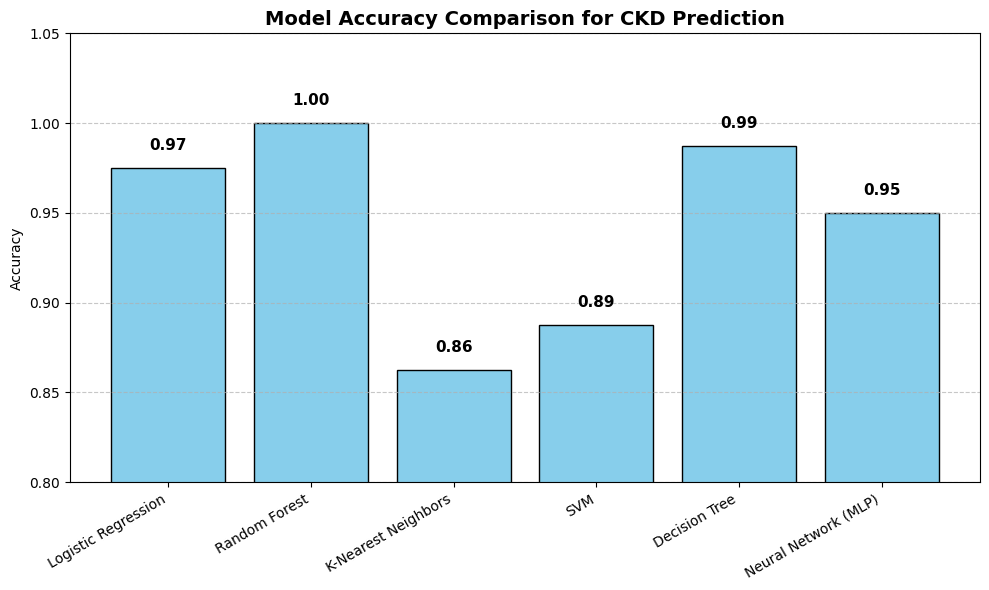

In [35]:
# Model accuracy data
accuracies = {
    'Logistic Regression': 0.975,
    'Random Forest': 1.0,
    'K-Nearest Neighbors': 0.8625,
    'SVM': 0.8875,
    'Decision Tree': 0.9875,
    'Neural Network (MLP)': 0.95
}

# Plot setup
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue', edgecolor='black')

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=11, weight='bold')

# Style
plt.ylim(0.8, 1.05)
plt.title("Model Accuracy Comparison for CKD Prediction", fontsize=14, weight='bold')
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.tight_layout()
plt.show()


# Prediction Visualizations

In [36]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

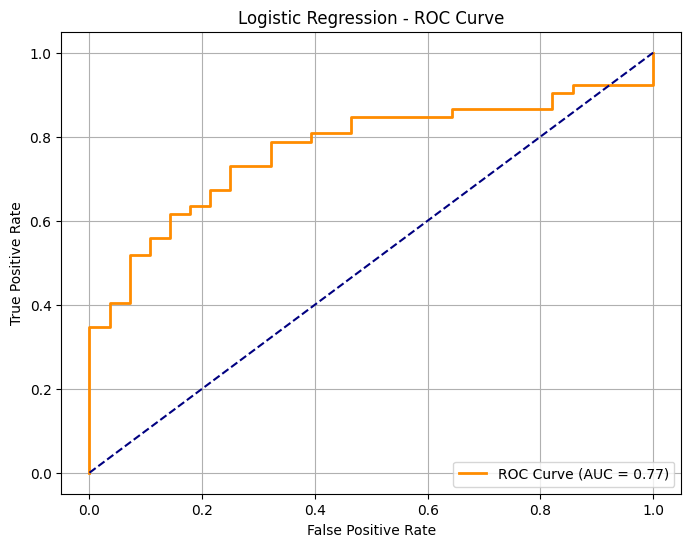

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with higher max_iter
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)
y_scores = log_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [38]:
print(confusion_matrix(y_test,y_pred))

[[27  1]
 [ 8 44]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        28
           1       0.98      0.85      0.91        52

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80



In [40]:
print(accuracy_score(y_test,y_pred))

0.8875


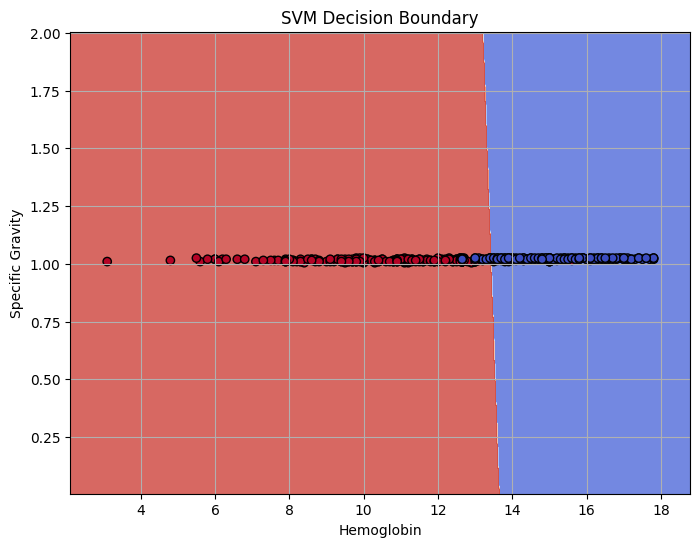

In [41]:
from sklearn.svm import SVC

# Select 2 features for 2D visualization
features_2d = ['hemo', 'sg']
X_vis = df[features_2d].values
y_vis = df['classification'].values

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_vis, y_vis)

# Plot decision boundary
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Hemoglobin')
plt.ylabel('Specific Gravity')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()


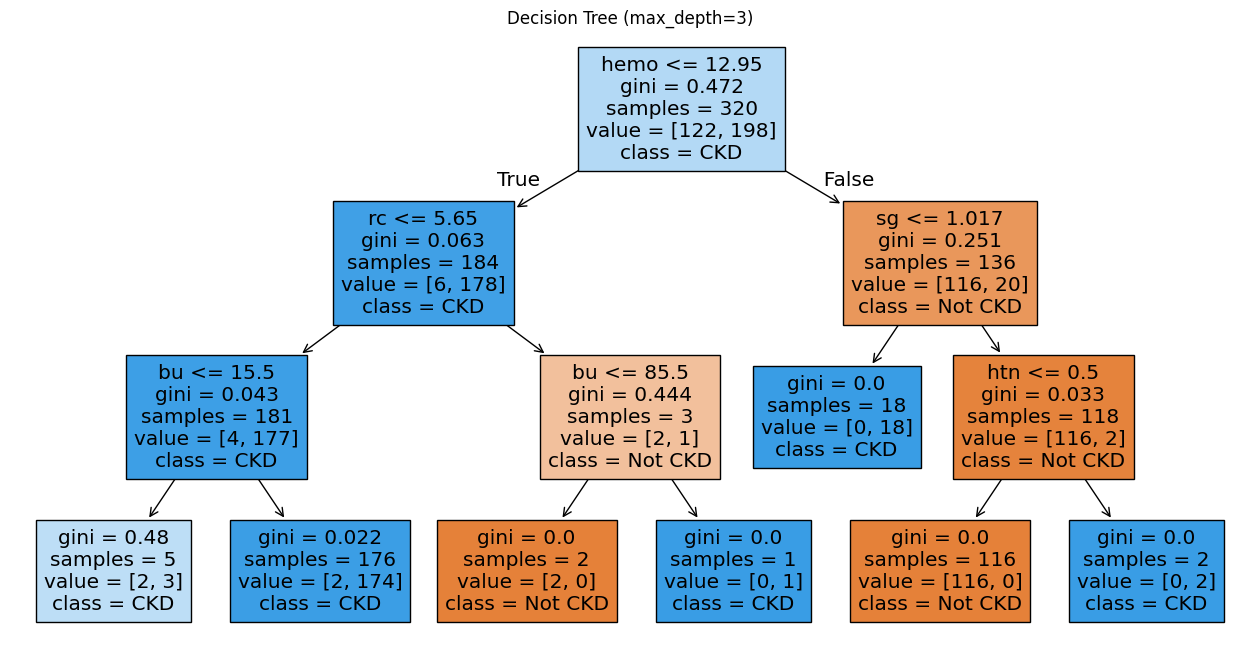

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not CKD', 'CKD'], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()


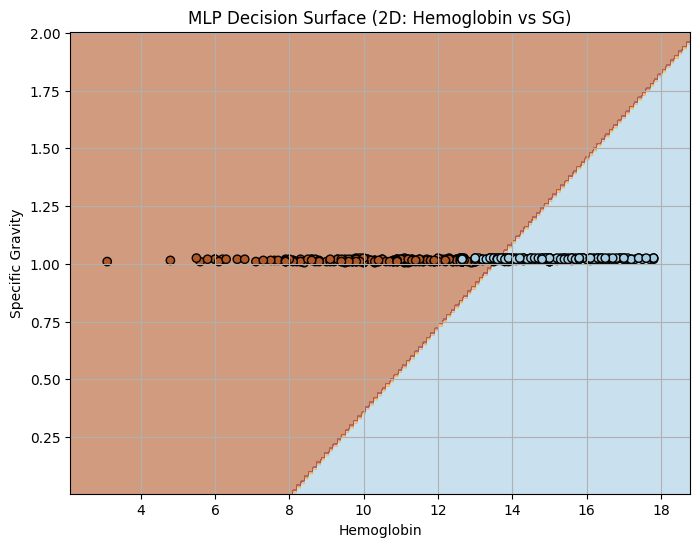

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_vis, y_vis)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.Paired, edgecolors='k')
plt.title("MLP Decision Surface (2D: Hemoglobin vs SG)")
plt.xlabel("Hemoglobin")
plt.ylabel("Specific Gravity")
plt.grid(True)
plt.show()


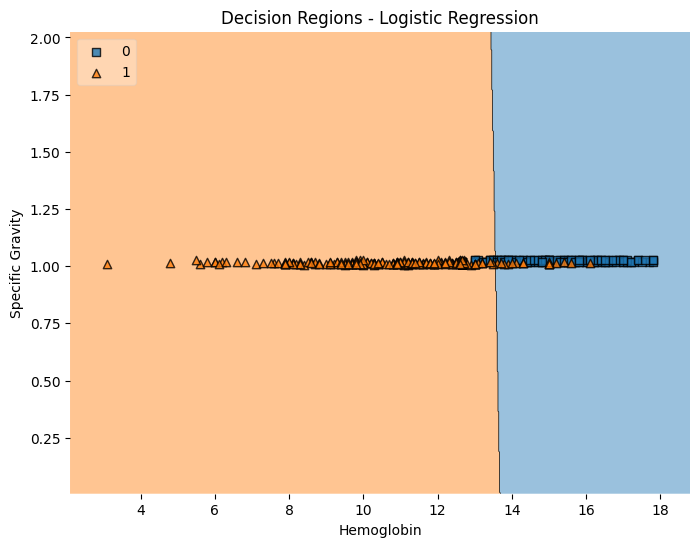

In [44]:
from mlxtend.plotting import plot_decision_regions

# Example with logistic model
log_model.fit(X_vis, y_vis)
plt.figure(figsize=(8, 6))
plot_decision_regions(X_vis, y_vis, clf=log_model, legend=2)
plt.xlabel("Hemoglobin")
plt.ylabel("Specific Gravity")
plt.title("Decision Regions - Logistic Regression")
plt.show()


# Explainability Using SHAP

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with higher max_iter
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)
y_scores = log_model.predict_proba(X_test)[:, 1]

In [46]:
import shap
# Use Random Forest model (or any other)
model = log_model  # Change to any model you want to explain


In [47]:
# Only use small sample for visualization to avoid performance issues
X_sample = X_train.sample(100, random_state=42)

# Initialize explainer
explainer = shap.Explainer(model, X_sample)

# Calculate SHAP values
shap_values = explainer(X_sample)


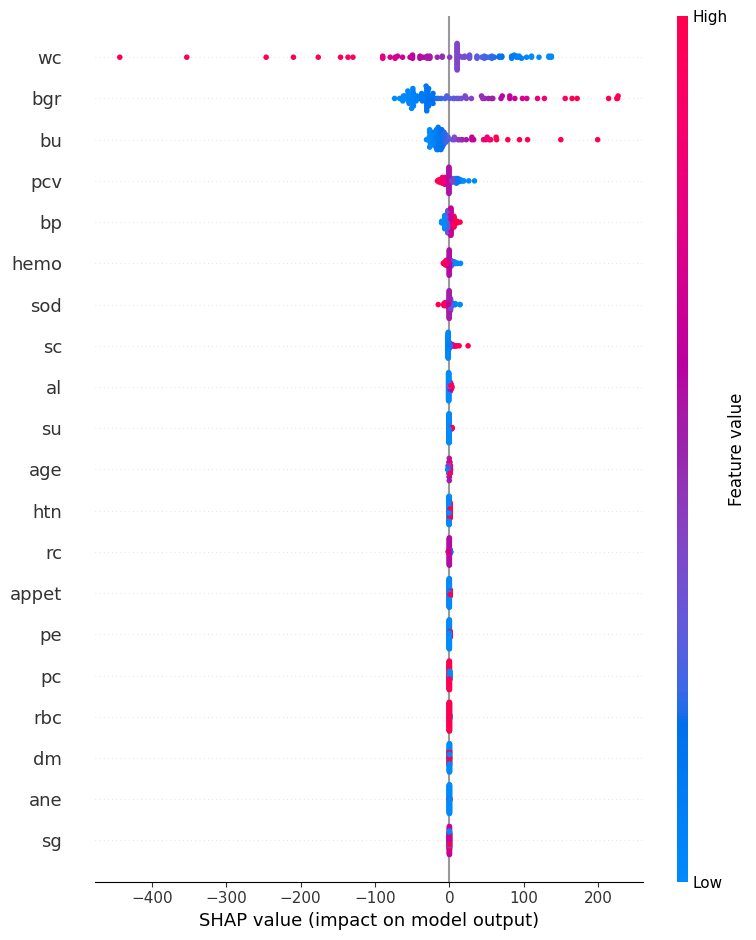

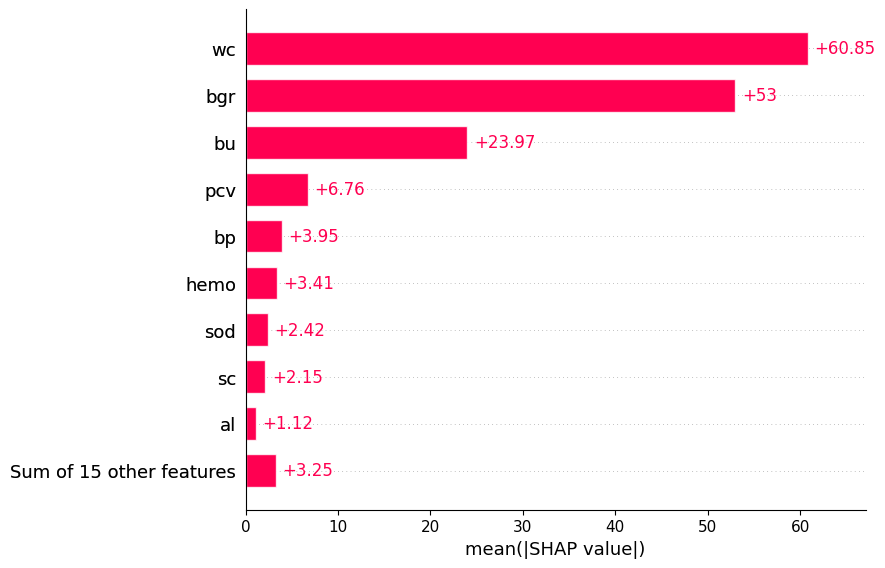

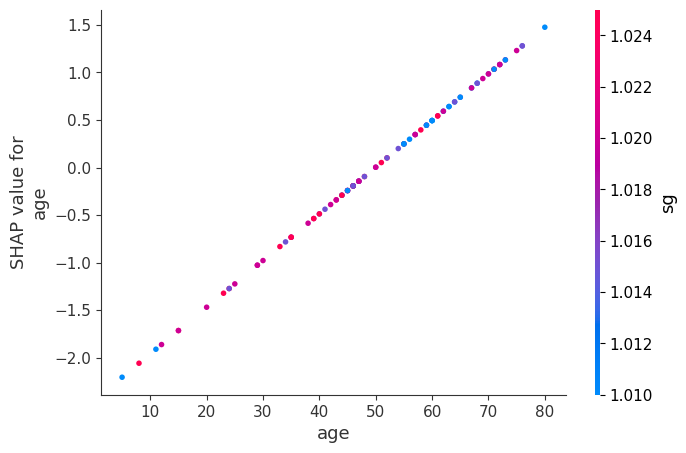

In [48]:
shap.summary_plot(shap_values, X_sample)
shap.plots.bar(shap_values)
shap.dependence_plot("age", shap_values.values, X_sample)

In [49]:
# Force plot (can be used in notebooks)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_sample.iloc[0])

In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Assuming df is your preprocessed DataFrame and target is 'classification'
X = df.drop(columns=['classification'])
y = df['classification']

# Handle categorical features and missing values if not done already
X = X.fillna(X.mean())
X = pd.get_dummies(X)  # one-hot encode any categorical columns

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(probability=True)),
    ('nb', GaussianNB()),
    ('gb', GradientBoostingClassifier(n_estimators=100))
]

# Meta-learner
meta_model = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Train
stack_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = stack_model.predict(X_test_scaled)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))

# Save model and scaler
joblib.dump(stack_model, "stack_kidney_model.pkl")
joblib.dump(scaler, "scaler.pkl")


Stacking Model Accuracy: 1.0


['scaler.pkl']

In [51]:
print(X.shape)
print(X.columns.tolist())

(400, 24)
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [53]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,1,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,3,1,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,4,1,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,1,0,0,0,1


In [54]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,3,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,3,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,3,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,3,1,0,0,0,0
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,...,53.0,6800.0,6.1,0,3,1,0,0,0,0
